In [2]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')
sys.path.append(home + '/projects/turbubox/tools')

import numpy as np
import pandas as pd
import glob
import cubicle
import turbubox.ulz as ulz

import scipy.interpolate

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline
import gausslobatto

dpi = 100
fac = 0.8
geo = (fac*1920,fac*1080)

from mpl_toolkits.mplot3d import axes3d

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#fp = '/mnt/sshfs/supermuc2/gss/scratch/pr62su/ri97lab8/StirTurb_CGM_dense5_512/StirTurb_hdf5_plt_cnt_0013'
fp = '/mnt/data/couchdg/centroid-taylor-expansion/data/chkpt_0000.h5'
#fp = '/home/jmark/tmp/crossroads/chkpt_0184.h5'
#fp = '/mnt/sshfs/cheops/scratch/jmarker2/couchdg/gravity/static/data/chkpt_0200.h5'
fh = cubicle.File(fp)
#fh.nodetype = 'gauss'
#fh.nodetype = 'cell-centered'
extent = fh.domain.T.ravel()
extent = np.roll(extent,2)

#dens, velx, vely, velz, pres = fh.get_prims(Nvisu=None, imspace=gausslobatto.mk_nodes(fh.npoly,fh.nodetype))
dens, velx, vely, velz, pres = fh.get_prims(Nvisu=34)
#dens, velx, vely, velz, pres = fh.get_prims(Nvisu=14)\

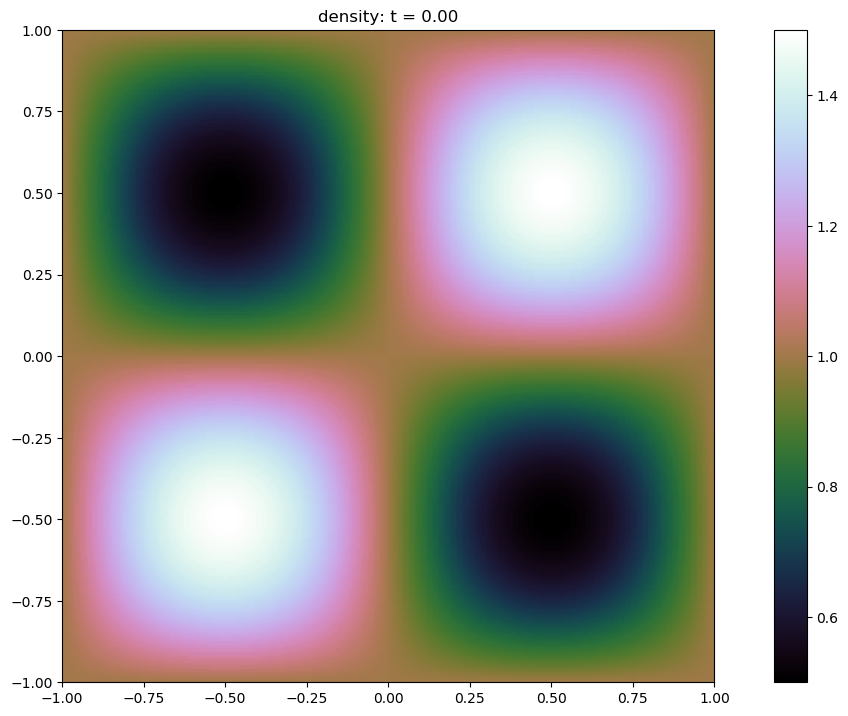

In [20]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = dens
#data = np.log10(dens)
#data = pres.T

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

In [867]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

#data = dens
#data = np.log10(dens)
data = np.sqrt(velx**2+vely**2)/np.sqrt(fh.gamma*pres/dens)

plt.title('mach: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

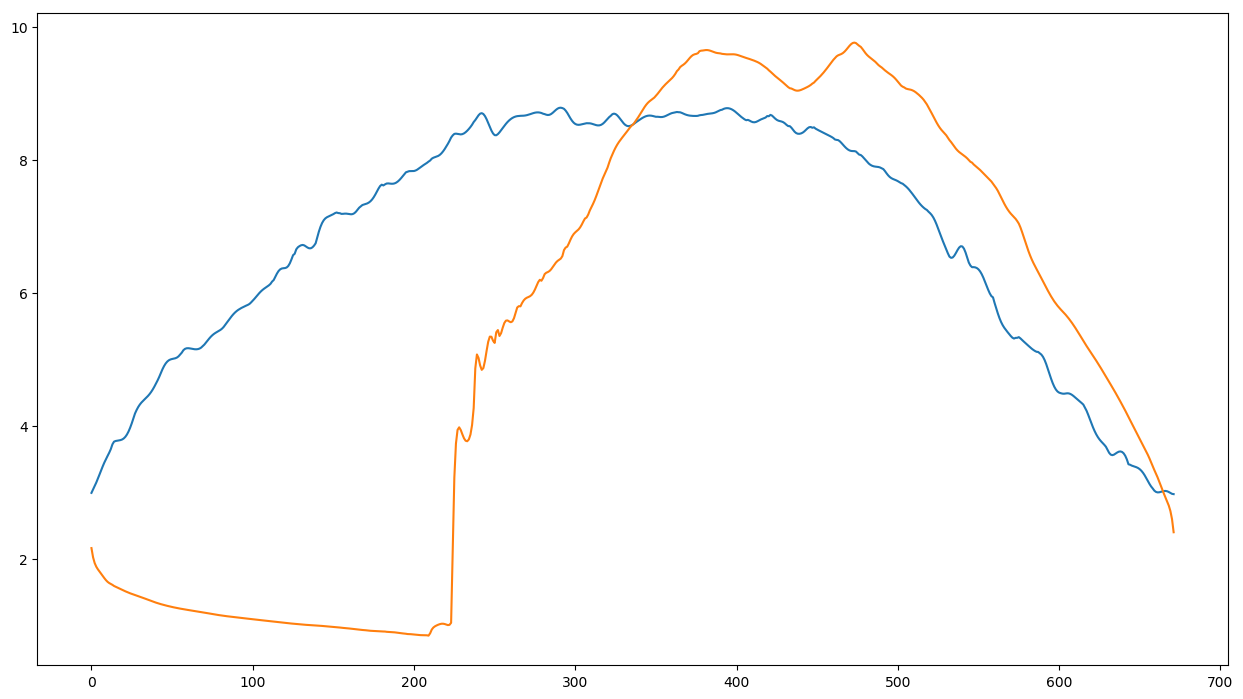

In [761]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = pres.T

plt.plot(data[:,data.shape[1]//2])
plt.plot(data[data.shape[0]//2,:])

In [167]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = dens.T

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

In [168]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = pres.T

plt.title('pressure: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 1,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


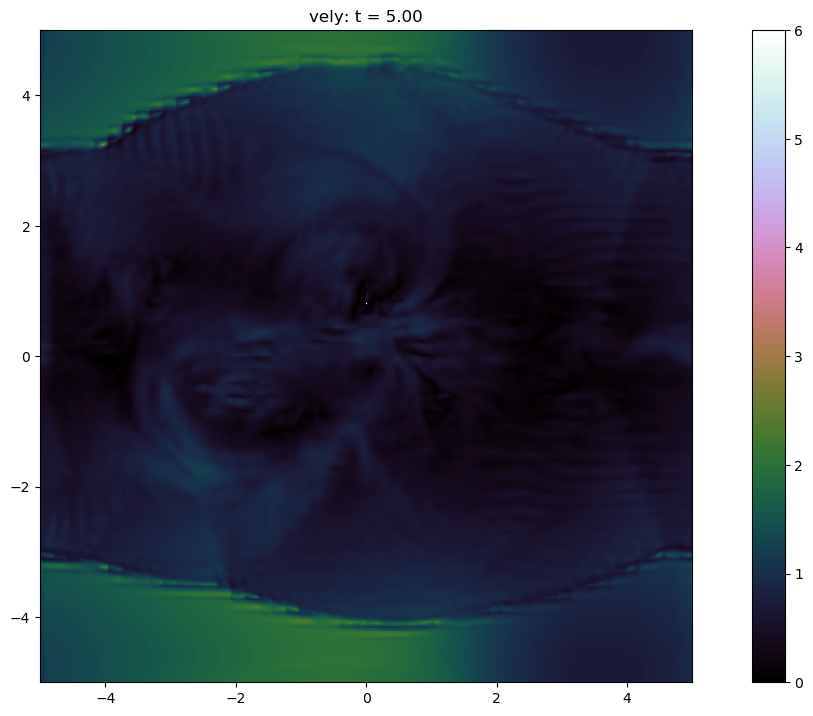

In [169]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = np.sqrt(velx**2+vely**2)/np.sqrt(fh.gamma*pres/dens)
data = data.T

plt.title('vely: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    vmin = 0,
    vmax = 6,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

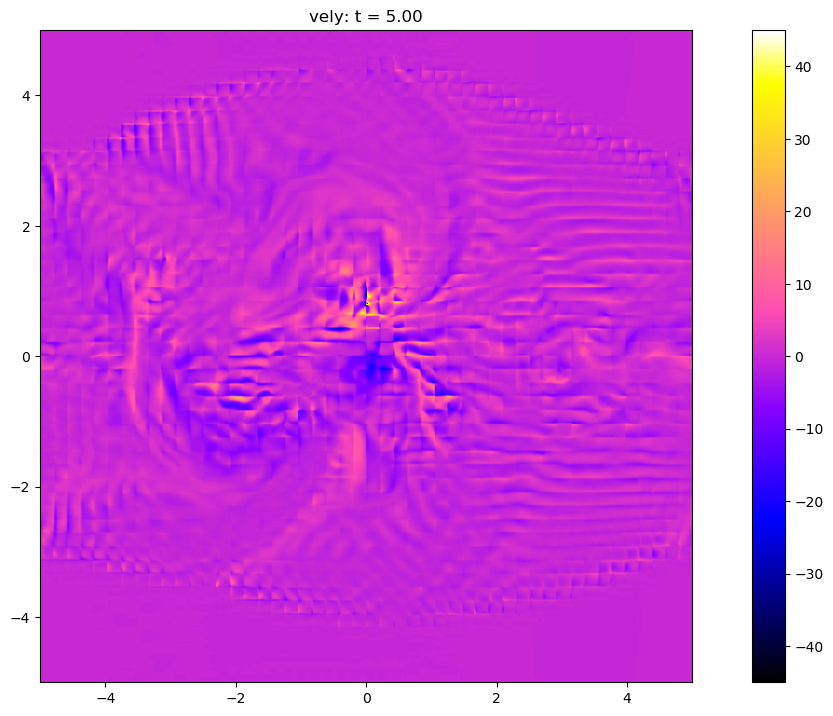

In [170]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
import vectoranalysis2D as v2

data  = v2.curl(velx,vely,Dx=fh.domsize[0]/velx.shape[0],Dy=fh.domsize[1]/vely.shape[1])
    
#data = np.sqrt(velx**2+vely**2)/np.sqrt(fh.gamma*pres/dens)
data = data.T

plt.title('vely: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    vmin = -45,
    vmax =  45,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gnuplot2'),
)
plt.colorbar()

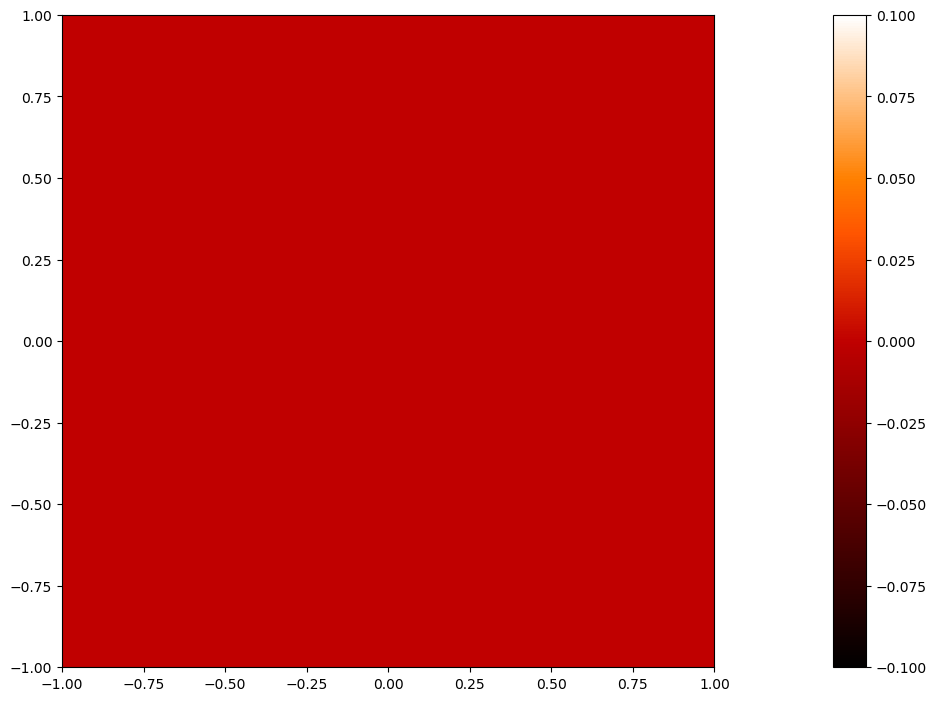

In [862]:
fig = plt.figure(1,figsize=(2*geo[0]/dpi, geo[1]/dpi), dpi=dpi)


data = fh.stitch(fh.profiles['level'],dname='profile')
data = data.T
#data = np.log10(data + 1e-16)

plt.imshow(
    data,
    extent = extent,
    #vmin = -5,
    #alpha=0.5,
    #vmax = 0.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)

plt.colorbar()

In [864]:
fig = plt.figure(1,figsize=(2*geo[0]/dpi, geo[1]/dpi), dpi=dpi)


data = fh.stitch(fh.profiles['moe'],dname='profile')
data = data.T
data = np.log10(data + 1e-16)

plt.imshow(
    data,
    extent = extent,
    vmin = -5,
    #alpha=0.5,
    vmax = 0.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)

plt.colorbar()

In [173]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = dens.T

plt.plot(data[:,data.shape[1]//4])
#plt.plot(data[data.shape[0]//2,:])


data = fh.stitch(fh.profiles['level'],dname='profile',Nvisu=14)
data = data.T
#data = np.log10(data + 1e-16)

plt.plot(data[:,data.shape[1]//4])
#plt.plot(data[data.shape[0]//2,:])

data = fh.stitch(fh.profiles['level'],dname='profile',Nvisu=14)
data = data.T
#data = np.log10(data + 1e-16)

plt.plot(data[:,data.shape[1]//4])
#plt.plot(data[data.shape[0]//2,:])

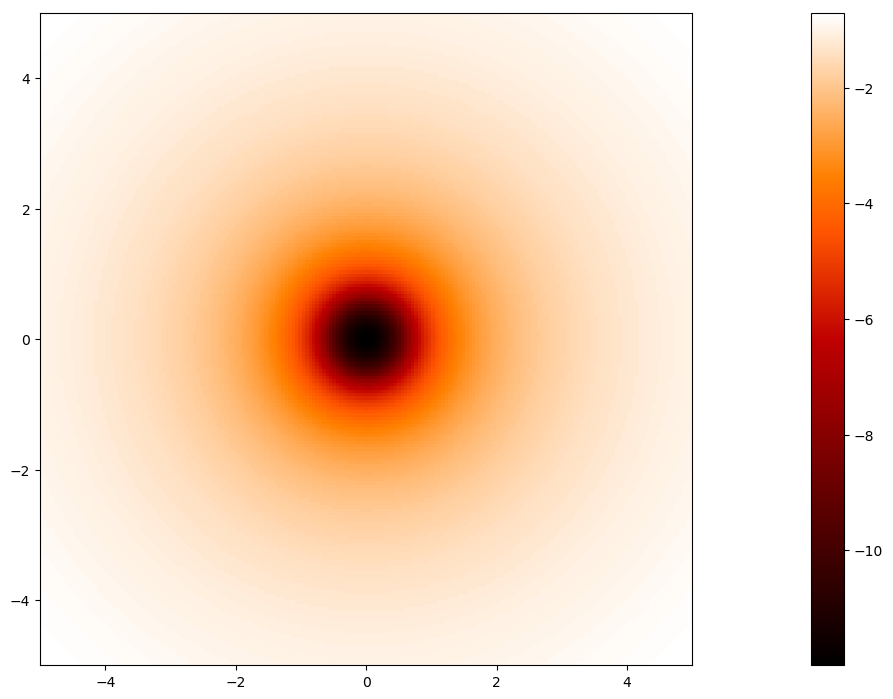

In [174]:
fig = plt.figure(1,figsize=(2*geo[0]/dpi, geo[1]/dpi), dpi=dpi)


data = fh.stitch(fh.profiles['vpot'],dname='profile')
data = data.T
#data = np.log10(data + 1e-16)

plt.imshow(
    data,
    extent = extent,
    #vmin = -5,
    #alpha=0.5,
    #vmax = 0.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)

plt.colorbar()

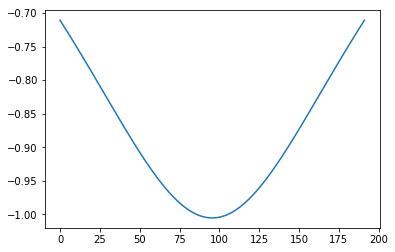

In [132]:
#fig = plt.figure(1,figsize=(2*geo[0]/dpi, geo[1]/dpi), dpi=dpi)


data = fh.stitch(fh.profiles['vpot'],dname='profile')
data = data.T
#data = np.log10(data + 1e-16)

plt.plot(data[:,0])

In [539]:
#fp = '/mnt/sshfs/supermuc2/gss/scratch/pr62su/ri97lab8/StirTurb_CGM_dense5_512/StirTurb_hdf5_plt_cnt_0013'
fp = '/mnt/data/couchdg/centroid-taylor-expansion/data/chkpt_0009.h5'
#fp = '/home/jmark/tmp/crossroads/chkpt_0184.h5'
#fp = '/mnt/sshfs/cheops/scratch/jmarker2/couchdg/gravity/static/data/chkpt_0200.h5'
fh = cubicle.File(fp)
#fh.nodetype = 'gauss'
#fh.nodetype = 'cell-centered'
extent = fh.domain.T.ravel()
extent = np.roll(extent,2)

#dens, velx, vely, velz, pres = fh.get_prims(Nvisu=None, imspace=gausslobatto.mk_nodes(fh.npoly,fh.nodetype))
dens, velx, vely, velz, pres = fh.get_prims(Nvisu=14)
#dens, velx, vely, velz, pres = fh.get_prims(Nvisu=14)

In [868]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=80)

stride = 8

#data = fh.stitch(fh.profiles['vpot'],dname='state')
#data = data.T
#data = np.log10(data + 1e-16)
data = dens
data = data.T

xs = ulz.mk_body_centered_linspace(-1,1,len(data))
xs,ys = np.meshgrid(xs,xs)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

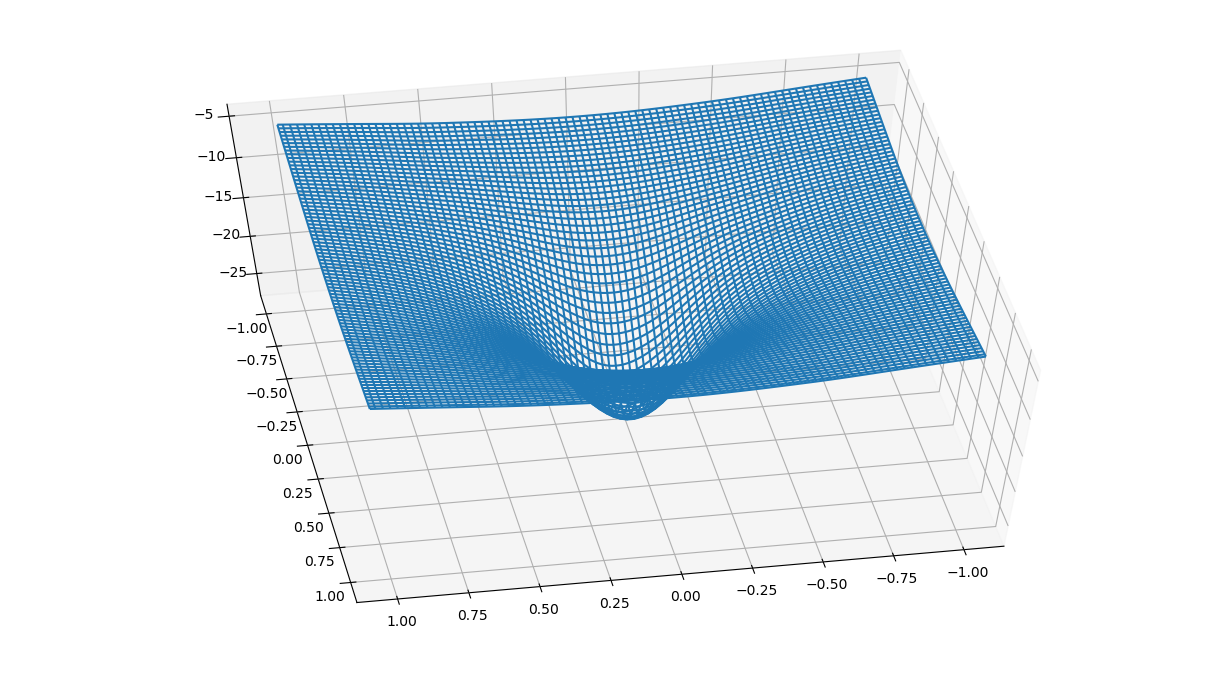

In [869]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=80)

stride = 4

data = fh.stitch(fh.profiles['vpot'],dname='profile',Nvisu=7)
#data = data.T
#data = np.log10(data + 1e-16)

xs = ulz.mk_body_centered_linspace(-1,1,len(data))
xs,ys = np.meshgrid(xs,xs)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

In [871]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=60.,azim=80)

stride = 4

data = fh.stitch(fh.profiles['vpot'],dname='profile',Nvisu=7)

#data = np.log10(abs(data))

plt.imshow(
    data,
    extent = extent,
    #vmin = -5,
    #alpha=0.5,
    #vmax = 0.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)

plt.colorbar()

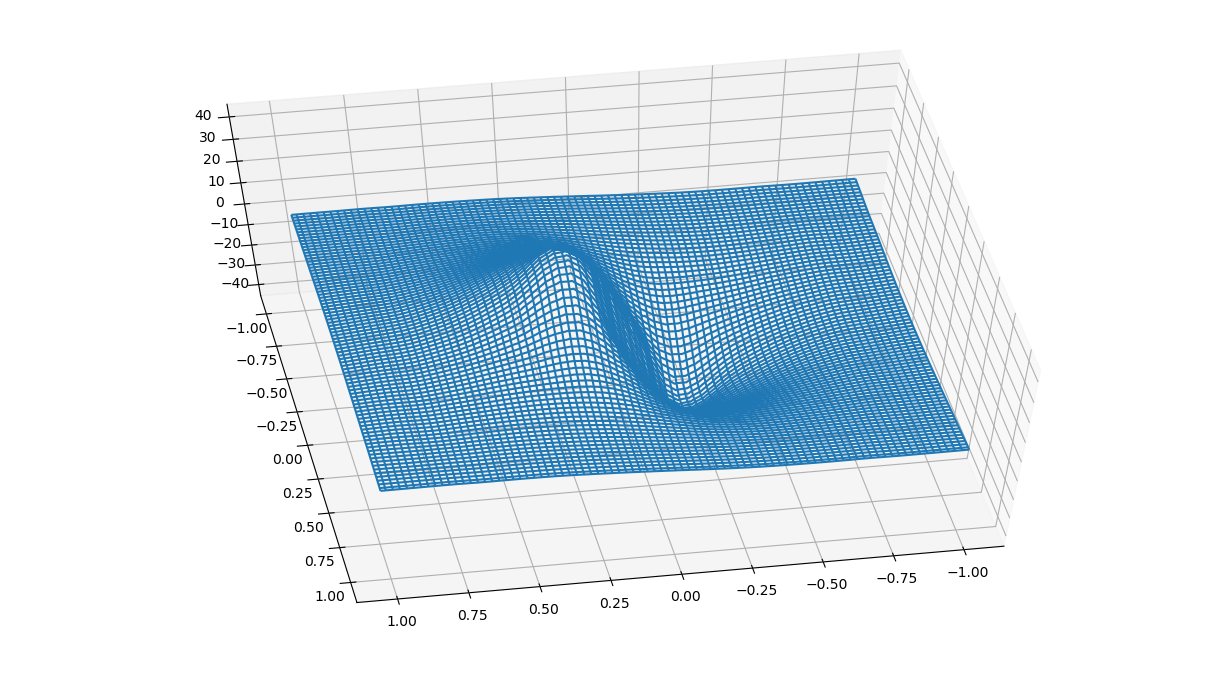

In [850]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=80)

stride = 4

data = fh.stitch(fh.profiles['dvx'],dname='profile',Nvisu=7)
#data = data.T
#data = np.log10(data + 1e-16)

xs = ulz.mk_body_centered_linspace(-1,1,len(data))
xs,ys = np.meshgrid(xs,xs)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

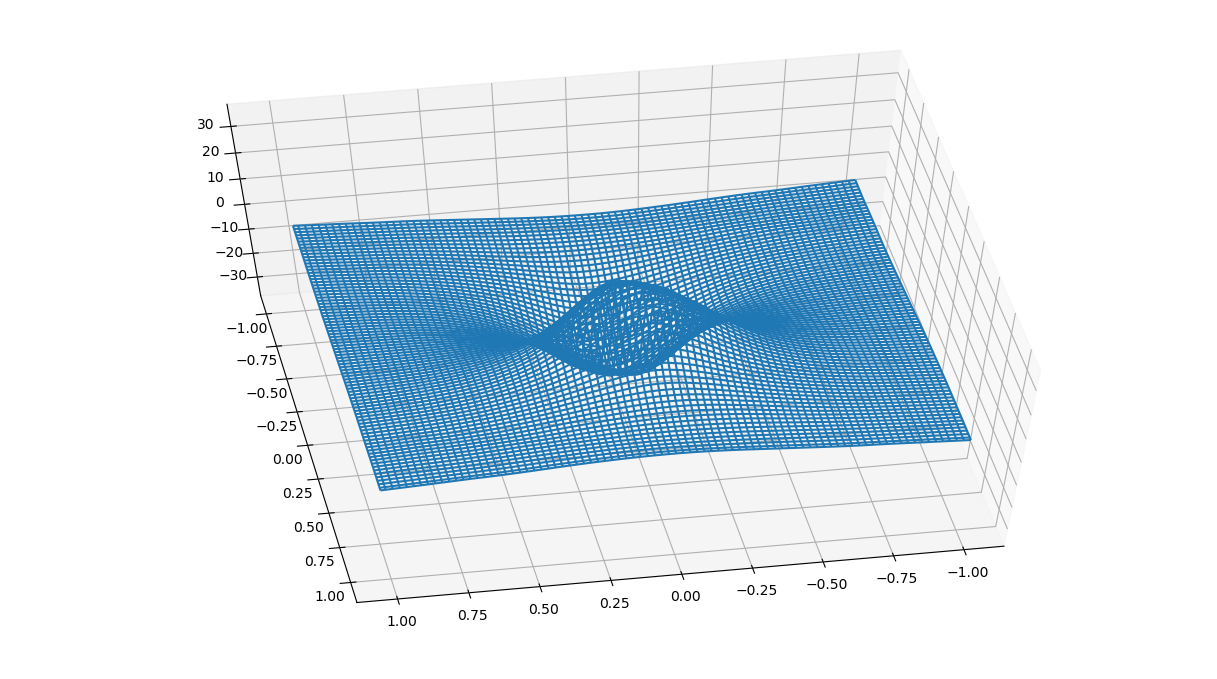

In [851]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=80)

stride = 4

data = fh.stitch(fh.profiles['dvy'],dname='profile',Nvisu=7)
#data = data.T
#data = np.log10(data + 1e-16)

xs = ulz.mk_body_centered_linspace(-1,1,len(data))
xs,ys = np.meshgrid(xs,xs)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

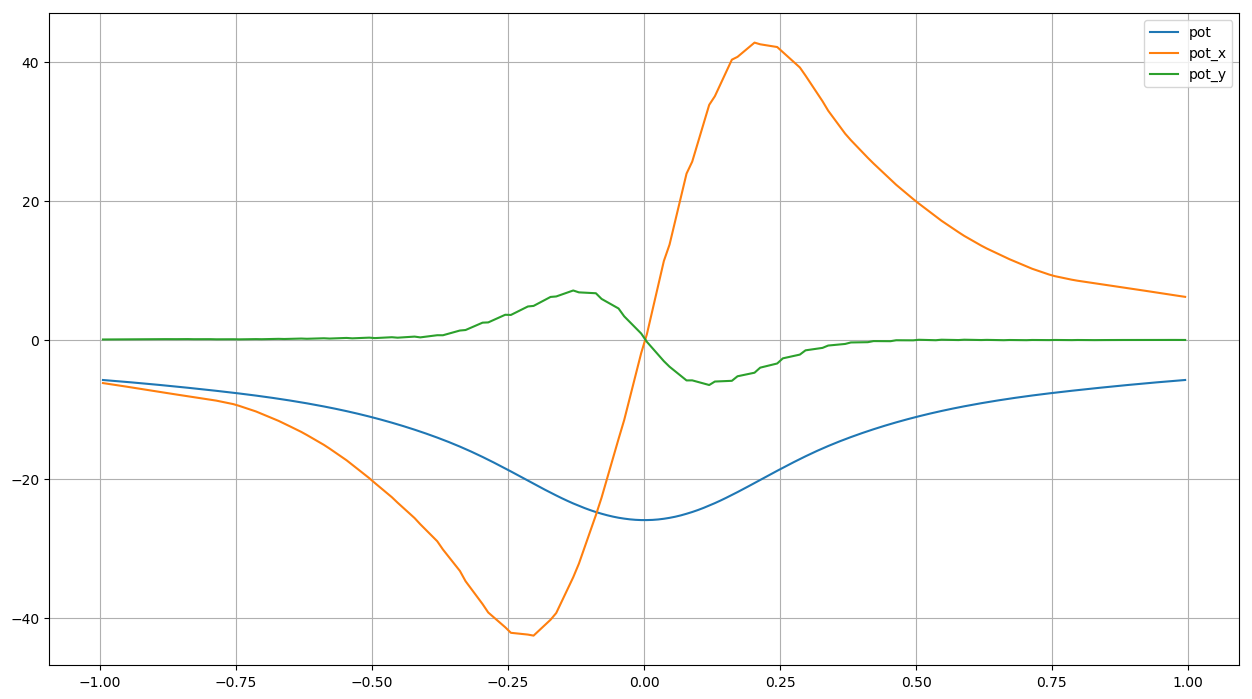

In [852]:
Nvisu=4

fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
data = fh.stitch(fh.profiles['vpot'],dname='profile',Nvisu=Nvisu)
xs = ulz.mk_body_centered_linspace(-1,1,len(data))
#xs,ys = np.meshgrid(xs,xs)
ys = data[len(data)//2,:]

ls = '-'

plt.grid()
plt.plot(xs,ys,ls,label='pot')

if 1:
    data = fh.stitch(fh.profiles['dvx'],dname='profile',Nvisu=Nvisu)
    xs = ulz.mk_body_centered_linspace(-1,1,len(data))
    #xs,ys = np.meshgrid(xs,xs)
    ys = data[len(data)//2,:]
    plt.plot(xs,ys,ls,label='pot_x')

    data = fh.stitch(fh.profiles['dvy'],dname='profile',Nvisu=Nvisu)
    xs = ulz.mk_body_centered_linspace(-1,1,len(data))
    #xs,ys = np.meshgrid(xs,xs)
    ys = data[len(data)//2,:]
    plt.plot(xs,ys,ls,label='pot_y')

plt.legend()

### fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
plt.xticks(xticks)
plt.grid()
plt.plot(xs,xs,'o')

In [10]:
xs

array([ 0.00520833,  0.02083333,  0.03645833,  0.046875  ,  0.0625    ,
        0.078125  ,  0.08854167,  0.10416667,  0.11979167,  0.13020833,
        0.14583333,  0.16145833,  0.171875  ,  0.1875    ,  0.203125  ,
        0.21354167,  0.22916667,  0.24479167,  0.25520833,  0.27083333,
        0.28645833,  0.296875  ,  0.3125    ,  0.328125  ,  0.33854167,
        0.35416667,  0.36979167,  0.38020833,  0.39583333,  0.41145833,
        0.421875  ,  0.4375    ,  0.453125  ,  0.46354167,  0.47916667,
        0.49479167,  0.50520833,  0.52083333,  0.53645833,  0.546875  ,
        0.5625    ,  0.578125  ,  0.58854167,  0.60416667,  0.61979167,
        0.63020833,  0.64583333,  0.66145833,  0.671875  ,  0.6875    ,
        0.703125  ,  0.71354167,  0.72916667,  0.74479167,  0.75520833,
        0.77083333,  0.78645833,  0.796875  ,  0.8125    ,  0.828125  ,
        0.83854167,  0.85416667,  0.86979167,  0.88020833,  0.89583333,
        0.91145833,  0.921875  ,  0.9375    ,  0.953125  ,  0.96

In [101]:
np.linspace(0,1,8*6//2)

array([ 0.        ,  0.04347826,  0.08695652,  0.13043478,  0.17391304,
        0.2173913 ,  0.26086957,  0.30434783,  0.34782609,  0.39130435,
        0.43478261,  0.47826087,  0.52173913,  0.56521739,  0.60869565,
        0.65217391,  0.69565217,  0.73913043,  0.7826087 ,  0.82608696,
        0.86956522,  0.91304348,  0.95652174,  1.        ])

In [64]:
import gausslobatto

In [53]:
npoly = 1
xs,ws = gausslobatto.LegendreGaussNodesAndWeights(fh.npoly)
xs

array([-0.77459667,  0.        ,  0.77459667])

In [55]:
(2 - xs[-1] + 

1.2254033307584573

In [82]:
-2-xs[0]

-1.4226497308103743

In [83]:
2+xs[0]

1.4226497308103743

In [104]:
np.concatenate([np.linspace(0,1,fh.mesh_nx_cells * fh.mesh_nx_patches//2,endpoint=False),[1]])

array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
        0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
        0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
        0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
        0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ])

In [9]:
xs = gausslobatto.mk_nodes(fh.npoly,ntype='gauss')
ys = np.linspace(0,1,fh.mesh_nx_cells * fh.mesh_nx_patches//2,endpoint=False)
ns = np.ravel(np.array([y + 0.5*(xs+1)/(fh.mesh_nx_cells * fh.mesh_nx_patches//2) for y in ys]))
ns

array([ 0.00289299,  0.01375039,  0.02791627,  0.03877367,  0.04455966,
        0.05541706,  0.06958294,  0.08044034,  0.08622633,  0.09708373,
        0.11124961,  0.12210701,  0.12789299,  0.13875039,  0.15291627,
        0.16377367,  0.16955966,  0.18041706,  0.19458294,  0.20544034,
        0.21122633,  0.22208373,  0.23624961,  0.24710701,  0.25289299,
        0.26375039,  0.27791627,  0.28877367,  0.29455966,  0.30541706,
        0.31958294,  0.33044034,  0.33622633,  0.34708373,  0.36124961,
        0.37210701,  0.37789299,  0.38875039,  0.40291627,  0.41377367,
        0.41955966,  0.43041706,  0.44458294,  0.45544034,  0.46122633,
        0.47208373,  0.48624961,  0.49710701,  0.50289299,  0.51375039,
        0.52791627,  0.53877367,  0.54455966,  0.55541706,  0.56958294,
        0.58044034,  0.58622633,  0.59708373,  0.61124961,  0.62210701,
        0.62789299,  0.63875039,  0.65291627,  0.66377367,  0.66955966,
        0.68041706,  0.69458294,  0.70544034,  0.71122633,  0.72

In [41]:
ns = np.array(gausslobatto.mk_nodes(fh.npoly,ntype=fh.nodetype))
fs = np.linspace(0,1,fh.mesh_nx_cells * fh.mesh_nx_patches//2,endpoint=False)
xs = np.array([y + 0.5*(ns+1)/(fh.mesh_nx_cells * fh.mesh_nx_patches//2) for y in fs])
xs = np.ravel(xs)
xs

array([ 0.        ,  0.04166667,  0.04166667,  0.08333333,  0.08333333,
        0.125     ,  0.125     ,  0.16666667,  0.16666667,  0.20833333,
        0.20833333,  0.25      ,  0.25      ,  0.29166667,  0.29166667,
        0.33333333,  0.33333333,  0.375     ,  0.375     ,  0.41666667,
        0.41666667,  0.45833333,  0.45833333,  0.5       ,  0.5       ,
        0.54166667,  0.54166667,  0.58333333,  0.58333333,  0.625     ,
        0.625     ,  0.66666667,  0.66666667,  0.70833333,  0.70833333,
        0.75      ,  0.75      ,  0.79166667,  0.79166667,  0.83333333,
        0.83333333,  0.875     ,  0.875     ,  0.91666667,  0.91666667,
        0.95833333,  0.95833333,  1.        ])

In [946]:

#xs = gausslobatto.mk_nodes(mpoly,ntype='gauss-lobatto')
#xs = np.ravel(ys)
[np.floor(0.5*nn*(x+1)) for x in xs]

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [24]:
npoly = 3
mpoly = 1
nn = int((npoly+1)/(mpoly+1))
ns = np.array(gausslobatto.mk_nodes(mpoly,ntype=fh.nodetype))
ys = np.array([X + (ns+1)/nn for X in np.linspace(-1,1,nn+1,endpoint=True)[:-1]])

xs = ulz.mk_body_centered_linspace(-1,1,5)
Xs = np.array([x + 1 - 2*np.floor(0.5*nn*(x+1))/nn for x in xs])

LL = np.array([[[[gausslobatto.LagrangePolynomial(ns,i,x)*gausslobatto.LagrangePolynomial(ns,j,y)
 for j in range(len(ns))]
 for i in range(len(ns))]
 for y in Xs]
 for x in Xs])

In [27]:
gausslobatto.mk_nodes(3,ntype='gauss-lobatto')

array([-1.       , -0.4472136,  0.4472136,  1.       ])

In [29]:
gausslobatto.mk_nodes_from_to(-1,0,3,ntype='gauss-lobatto')

array([-1.       , -0.7236068, -0.2763932,  0.       ])

In [8]:
#fp = '/mnt/sshfs/supermuc2/gss/scratch/pr62su/ri97lab8/StirTurb_CGM_dense5_512/StirTurb_hdf5_plt_cnt_0013'
fp = '/mnt/data/couchdg/centroid-taylor-expansion/data/chkpt_0020.h5'
#fp = '/home/jmark/tmp/crossroads/chkpt_0184.h5'
#fp = '/mnt/sshfs/cheops/scratch/jmarker2/couchdg/gravity/static/data/chkpt_0200.h5'
fh = cubicle.File(fp)
#fh.nodetype = 'gauss'
#fh.nodetype = 'cell-centered'
extent = fh.domain.T.ravel()
extent = np.roll(extent,2)

Nvisu = 2*(fh.npoly+1)

fh.npoly, fh.mpoly, Nvisu

(3, 1, 8)

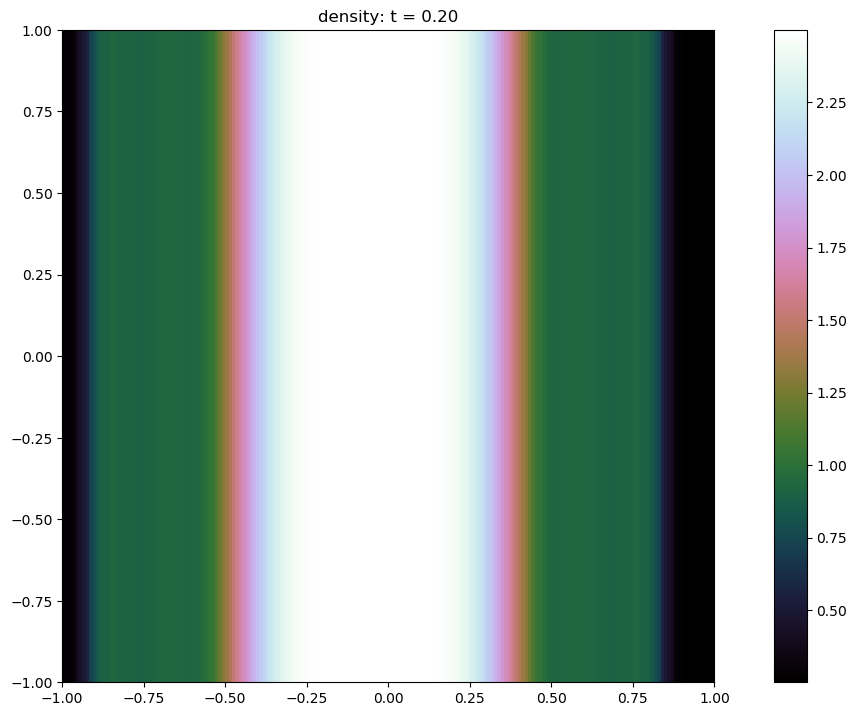

In [9]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

dens = fh.stitch_structured_2(3,Nvisu=Nvisu,mpoly=fh.mpoly)
#dens = fh.stitch_structured(0,Nvisu=Nvisu)

data = dens
#data = np.log10(dens)
#data = pres.T

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

In [1638]:
lvpot = fh.stitch_structured_2(fh.profiles['vpot'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
svpot = fh.stitch_structured_2(fh.profiles['svpot'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

laccx = fh.stitch_structured_2(fh.profiles['dvx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
laccy = fh.stitch_structured_2(fh.profiles['dvy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

saccx = fh.stitch_structured_2(fh.profiles['saccx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
saccy = fh.stitch_structured_2(fh.profiles['saccy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

sacc = np.sqrt(saccx**2 + saccy**2)
lacc = np.sqrt(laccx**2 + laccy**2)
acc  = np.sqrt((saccx+laccx)**2 + (saccy+laccy)**2)

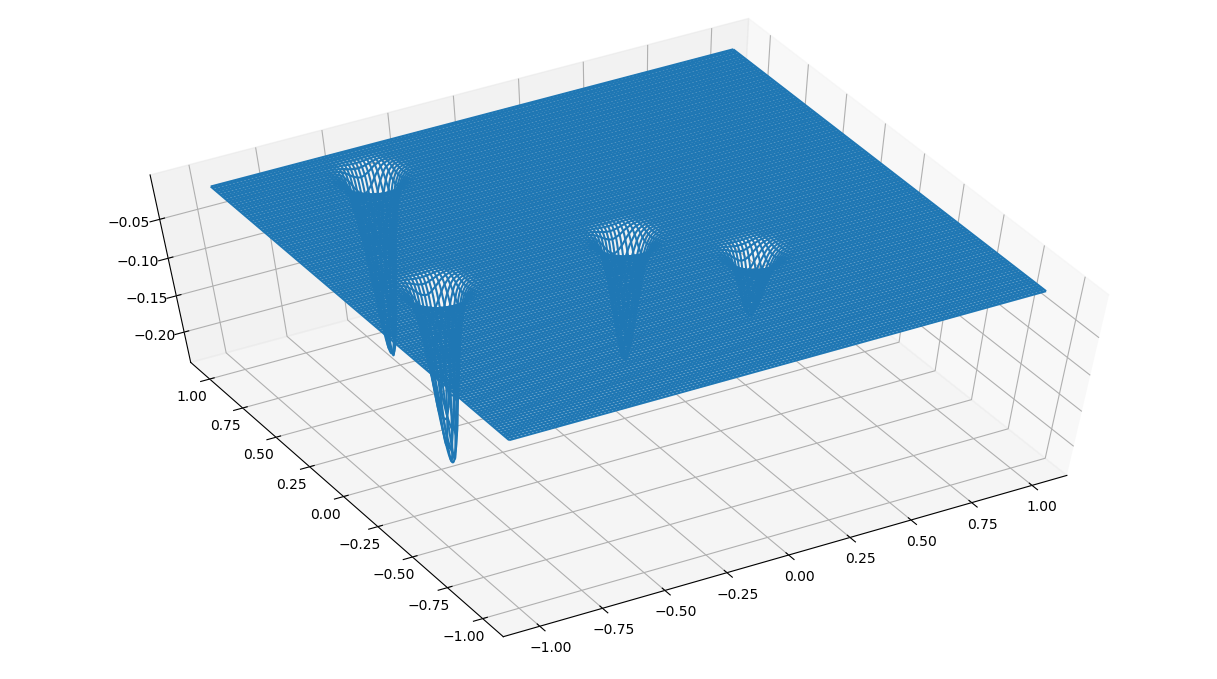

In [1639]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 8

data  = svpot
#data = np.log10(-data)

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

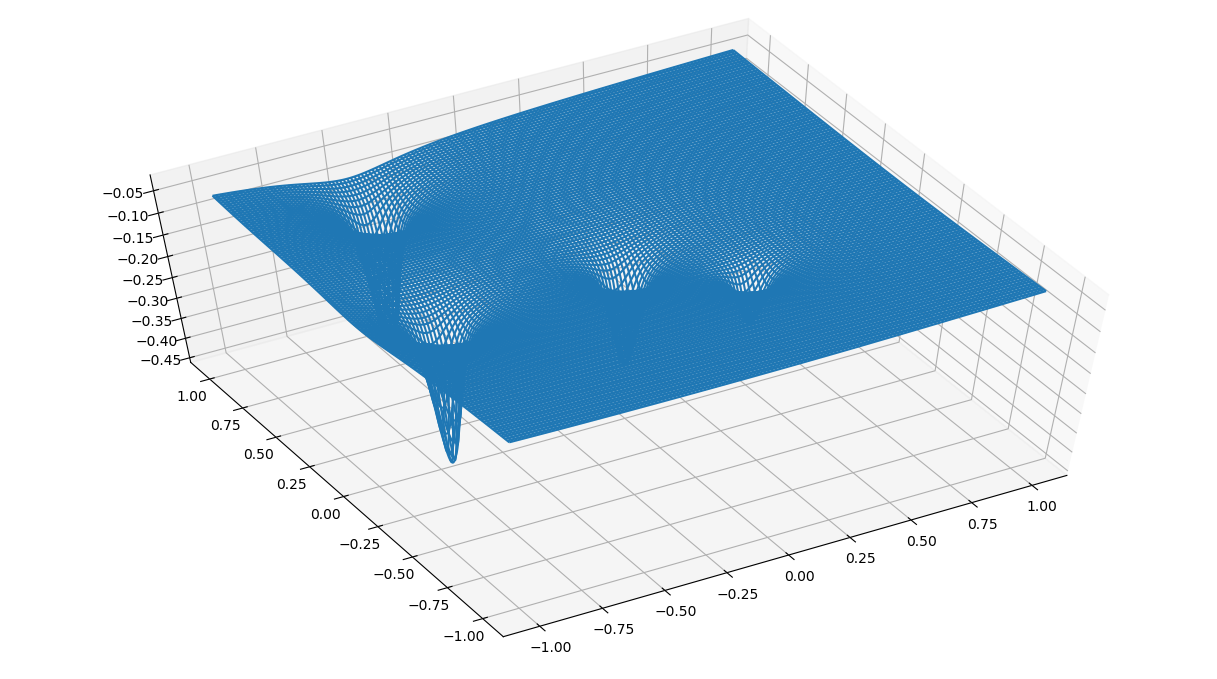

In [1640]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 8

data  = lvpot + svpot
#data = np.log10(-data)

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

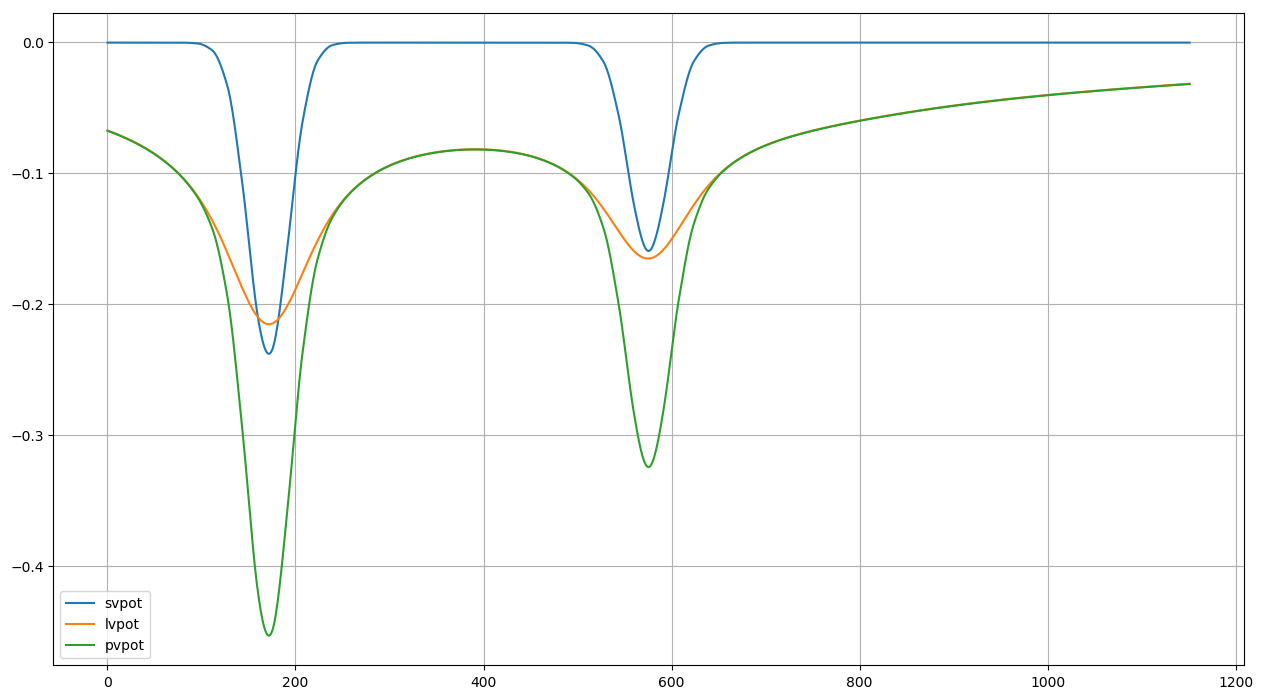

In [1641]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[data.shape[0]//2,:]

#plt.plot(doslice(dens),ls,label='dens')
plt.plot(doslice(svpot),ls,label='svpot')
plt.plot(doslice(lvpot),ls,label='lvpot')
plt.plot(doslice(svpot + lvpot),ls,label='pvpot')

#plt.ylim(-2,2)
plt.grid()
plt.legend()

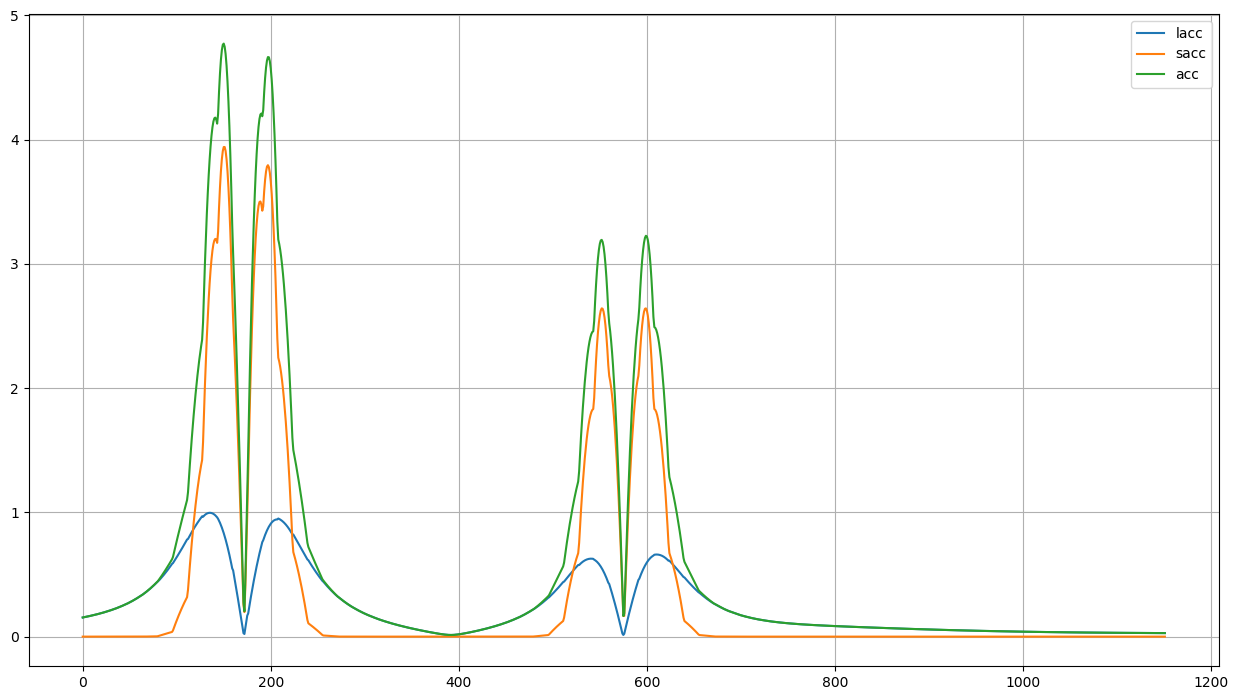

In [1642]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[data.shape[0]//2,:]

plt.plot(doslice(lacc),ls,label='lacc')
plt.plot(doslice(sacc),ls,label='sacc')
plt.plot(doslice( acc),ls,label='acc')

#plt.ylim(-2,2)
plt.grid()
plt.legend()

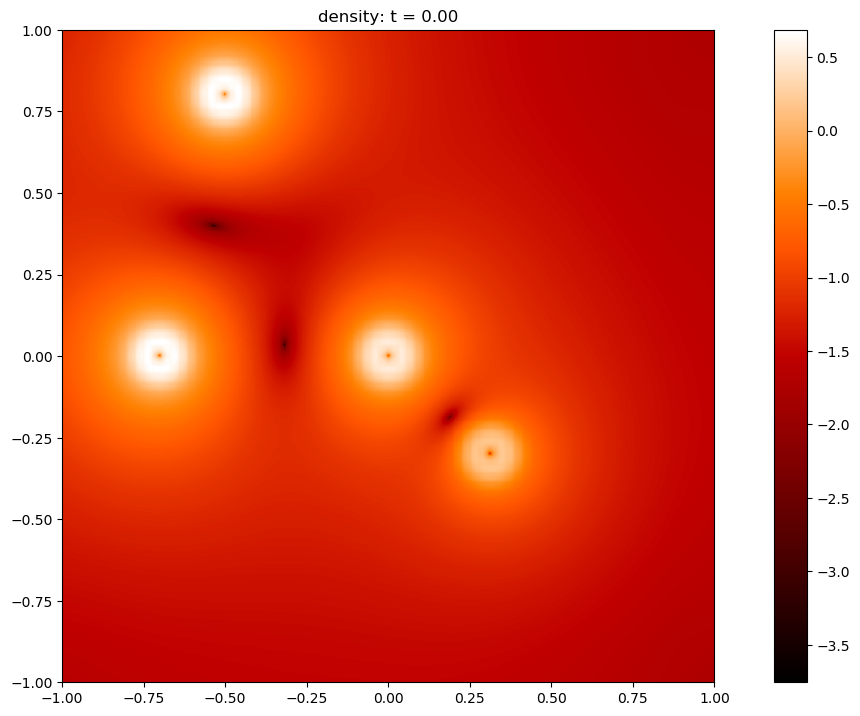

In [1643]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = acc
data = np.log10(data)

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)
plt.colorbar()

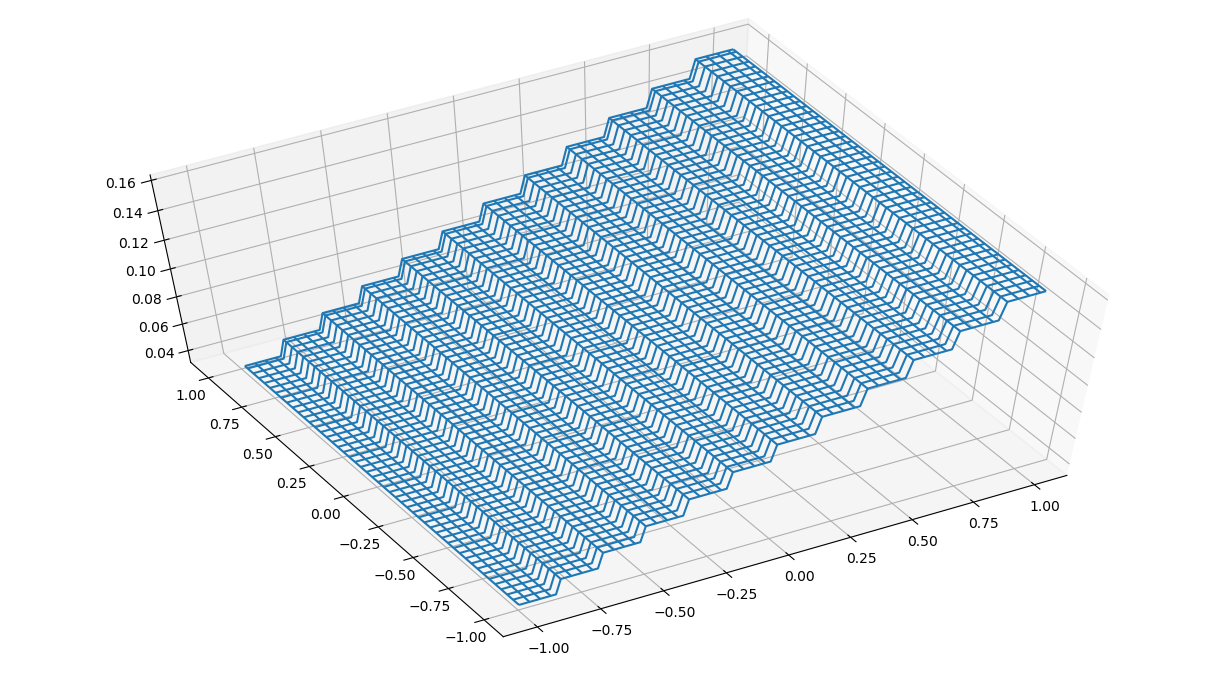

In [961]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 2

lvpot = fh.stitch_structured_2(fh.profiles['mm'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
data = lvpot
#data = np.log10(-data)

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

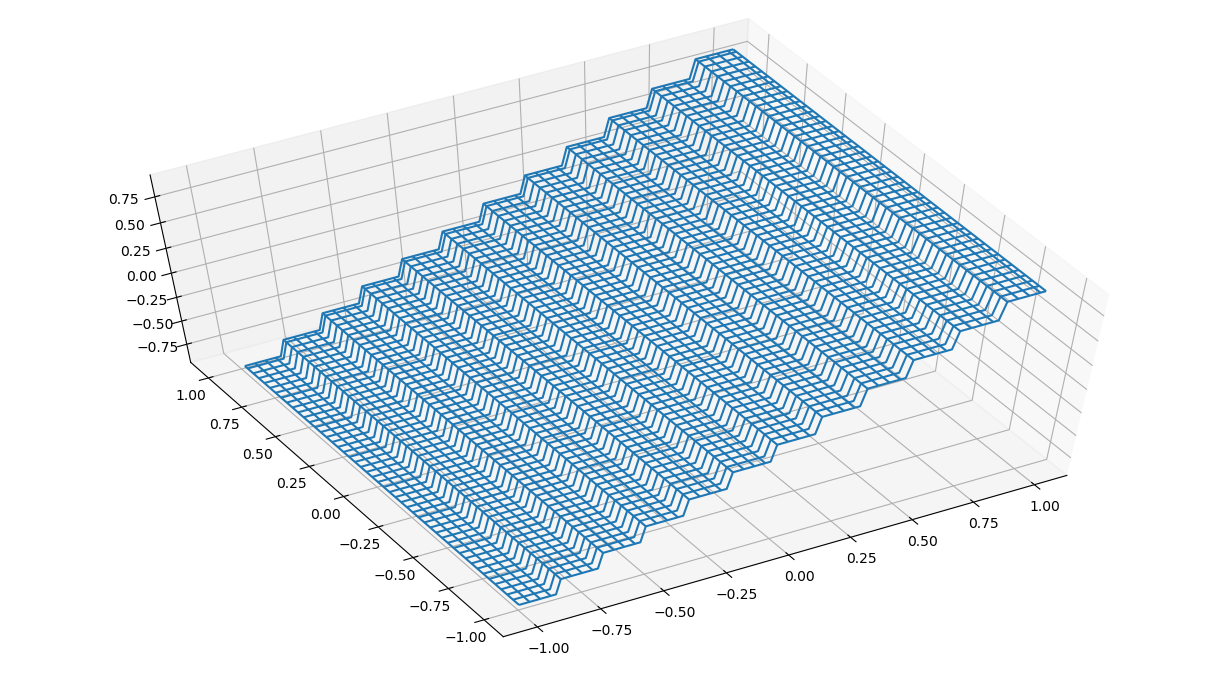

In [963]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.,azim=-120)

stride = 2

lvpot = fh.stitch_structured_2(fh.profiles['mx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
data = lvpot
#data = np.log10(-data)

xs = ulz.mk_body_centered_linspace(-1,1,data.shape[1])
ys = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
xs,ys = np.meshgrid(xs,ys)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)

In [968]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[data.shape[0]//2,:]

data = 15*fh.stitch_structured_2(fh.profiles['mm'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
plt.plot(doslice(data),ls,label='mm')

data = 1.4+fh.stitch_structured_2(fh.profiles['mx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
plt.plot(doslice(data),ls,label='mx')

#plt.ylim(-2,2)
plt.grid()
plt.legend()

In [736]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

svpot = fh.stitch_structured_2(fh.profiles['ip'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
data  = svpot
#data = np.log10(-data)

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = -0.1,
    #vmax =  0.1,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)
plt.colorbar()

In [663]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

data = lvpot + svpot
data = np.log10(-data)

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)
plt.colorbar()

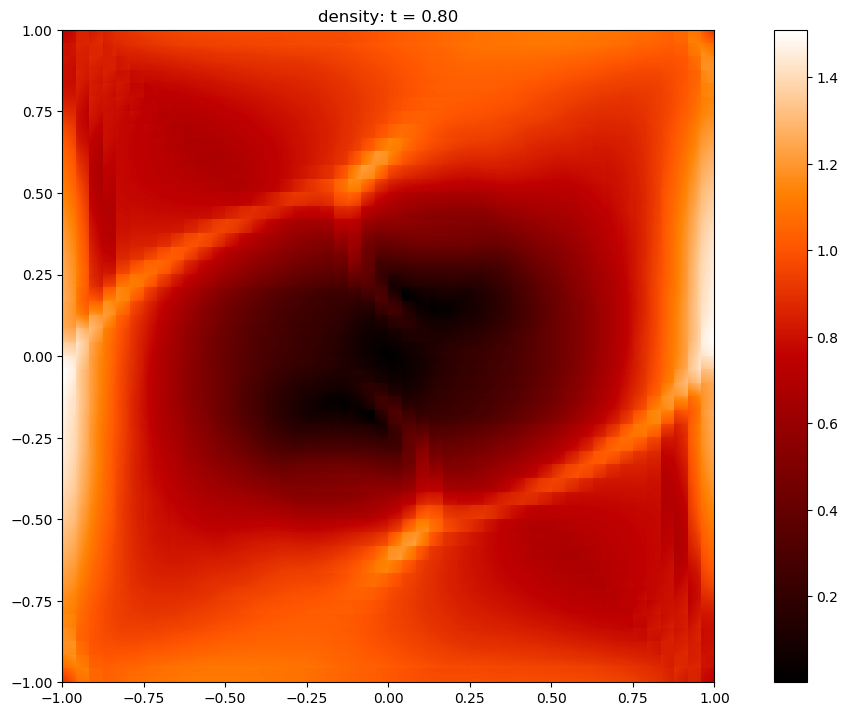

In [653]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

laccx = fh.stitch_structured_2(fh.profiles['dvx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
laccy = fh.stitch_structured_2(fh.profiles['dvy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

saccx = fh.stitch_structured_2(fh.profiles['saccx'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')
saccy = fh.stitch_structured_2(fh.profiles['saccy'],Nvisu=Nvisu,mpoly=fh.mpoly,dname='profile')

data = np.sqrt((laccx+saccx)**2 + (laccy+saccy)**2)
#data = np.log10(data)

plt.title('density: t = {:.2f}'.format(fh.time))
plt.imshow(
    data,
    extent = extent,
    #vmin = 0,
    #vmax = 15,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('gist_heat'),
)
plt.colorbar()

In [654]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[len(x)//2,:]

lacc = laccx
sacc = saccx
pacc = lacc + sacc

ls = '-'
plt.grid()

pvpot = lvpot + svpot

if 1:
    #plt.plot(doslice(dens),ls,label='dens')
    plt.plot(doslice(lacc),ls,label='lacc')
    plt.plot(doslice(sacc),ls,label='sacc')
    #plt.plot(doslice(pacc),ls,label='pacc')

if 0:
    plt.plot(doslice(lvpot),ls,label='lvpot')
    plt.plot(doslice(svpot),ls,label='svpot')
    plt.plot(doslice(pvpot),ls,label='pvpot')

#plt.ylim(-2,2)
plt.legend()

ValueError: operands could not be broadcast together with shapes (112,112) (12,96) 

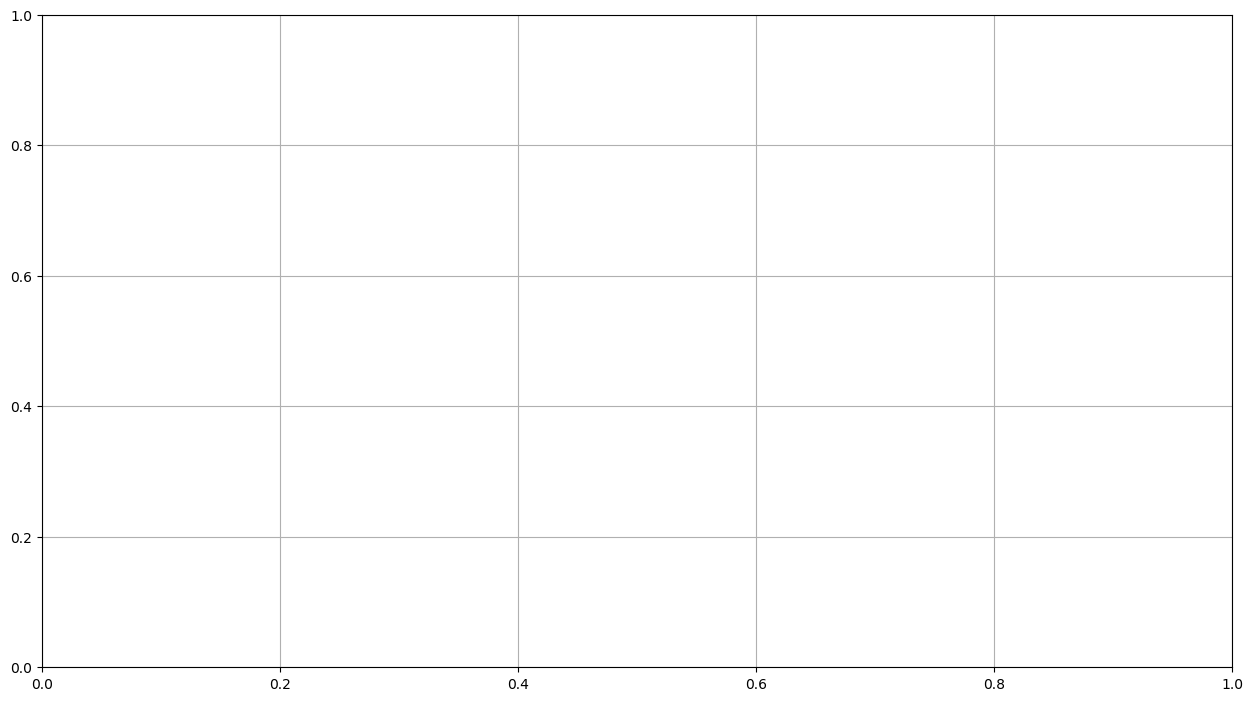

In [831]:
fig = plt.figure(1,figsize=(geo[0]/dpi, geo[1]/dpi), dpi=dpi)

doslice = lambda x: x[:,len(x)//2]

lacc = laccx
sacc = saccx
pacc = lacc + sacc

ls = '-'
plt.grid()

pvpot = lvpot + svpot

if 0:
    plt.plot(doslice(lacc),ls,label='lacc')
    plt.plot(doslice(sacc),ls,label='sacc')
    #plt.plot(doslice(pacc),ls,label='pacc')

if 1:
    #plt.plot(doslice(lvpot),ls,label='lvpot')
    plt.plot(doslice(svpot),ls,label='svpot')
    #plt.plot(doslice(pvpot),ls,label='pvpot')

#plt.ylim(-2,2)
plt.legend()